In [18]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

In [20]:
df=pd.read_csv('train.csv')

In [22]:
df.head()

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   date    913000 non-null  object
 1   store   913000 non-null  int64 
 2   item    913000 non-null  int64 
 3   sales   913000 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 27.9+ MB


In [26]:
df.shape

(913000, 4)

In [28]:
df.drop(['store','item'],axis=1,inplace=True)

In [377]:
df.head()

,date,sales
0,2013-01,13
1,2013-01,11
2,2013-01,14
3,2013-01,13
4,2013-01,10


In [34]:
df['date']=pd.to_datetime(df['date'])

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   date    913000 non-null  datetime64[ns]
 1   sales   913000 non-null  int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 13.9 MB


In [40]:
df['date']=df['date'].dt.to_period('M')
monthly_sales=df.groupby('date').sum().reset_index()

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype    
---  ------  --------------   -----    
 0   date    913000 non-null  period[M]
 1   sales   913000 non-null  int64    
dtypes: int64(1), period[M](1)
memory usage: 13.9 MB


In [50]:
monthly_sales.head()

,date,sales
0,2013-01,454904
1,2013-02,459417
2,2013-03,617382
3,2013-04,682274
4,2013-05,763242


In [54]:
monthly_sales['date']=monthly_sales['date'].dt.to_timestamp()

In [56]:
monthly_sales.head()

,date,sales
0,2013-01-01,454904
1,2013-02-01,459417
2,2013-03-01,617382
3,2013-04-01,682274
4,2013-05-01,763242


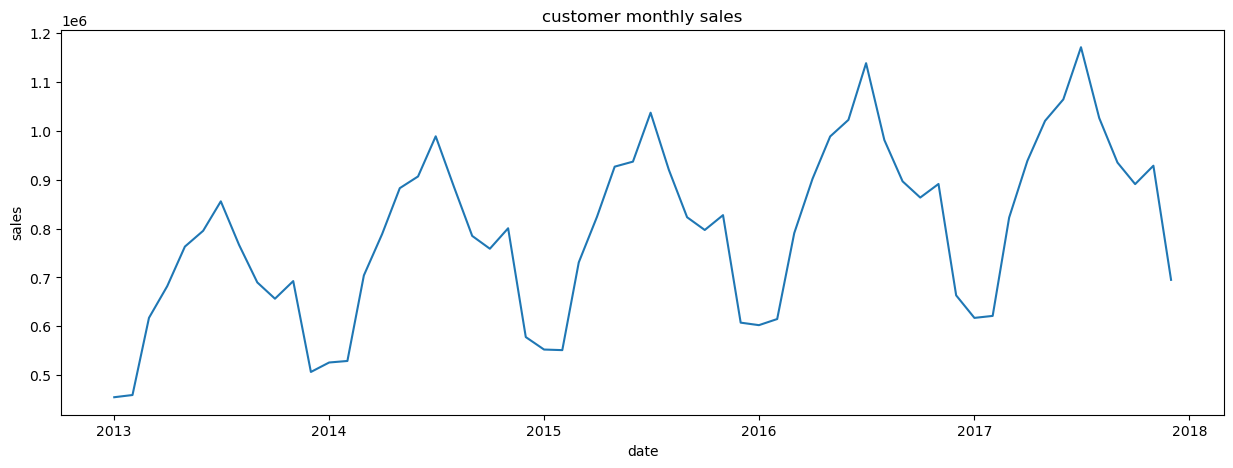

In [58]:
plt.figure(figsize=(15,5))
plt.plot(monthly_sales['date'],monthly_sales['sales'])
plt.xlabel('date')
plt.ylabel('sales')
plt.title('customer monthly sales')
plt.show()

In [62]:
monthly_sales['sales_diff']=monthly_sales['sales'].diff()
monthly_sales=monthly_sales.dropna()
monthly_sales.head(10)

C:\Users\python215\AppData\Local\Temp\ipykernel_16728\670643569.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthly_sales['sales_diff']=monthly_sales['sales'].diff()


,date,sales,sales_diff
2,2013-03-01,617382,157965.0
3,2013-04-01,682274,64892.0
4,2013-05-01,763242,80968.0
5,2013-06-01,795597,32355.0
6,2013-07-01,855922,60325.0
7,2013-08-01,766761,-89161.0
8,2013-09-01,689907,-76854.0
9,2013-10-01,656587,-33320.0
10,2013-11-01,692643,36056.0
11,2013-12-01,506607,-186036.0


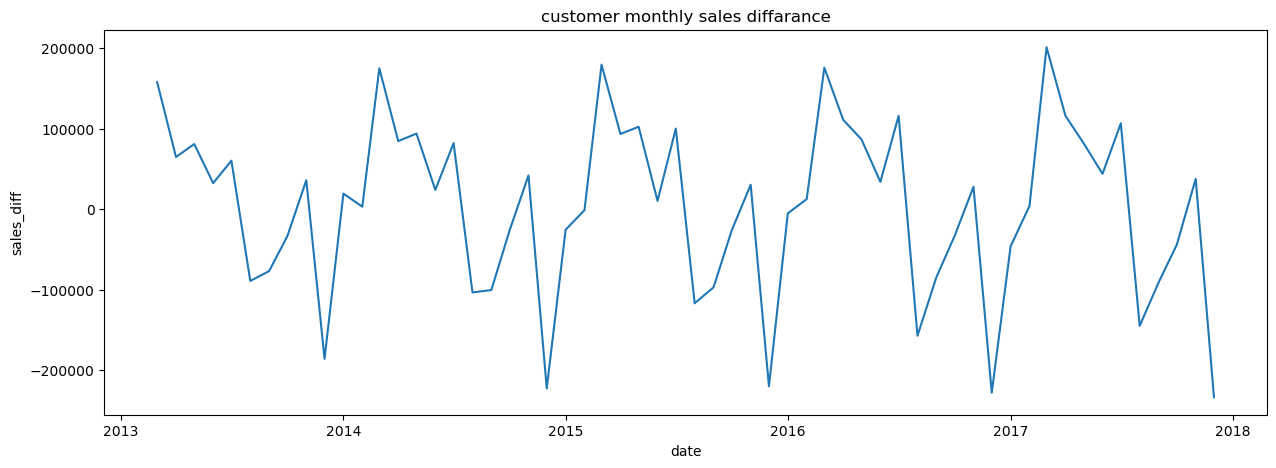

In [68]:
plt.figure(figsize=(15,5))
plt.plot(monthly_sales['date'],monthly_sales['sales_diff'])
plt.xlabel('date')
plt.ylabel('sales_diff')
plt.title('customer monthly sales diffarance')
plt.show()

# Droping the date and sales columns

In [71]:
supervised_data=monthly_sales.drop(['date','sales'],axis=1)

In [73]:
supervised_data.head()

,sales_diff
2,157965.0
3,64892.0
4,80968.0
5,32355.0
6,60325.0


In [75]:
#preparing supervised data
for i in range(1,13):
    col_name='month_'+str(i)
    supervised_data[col_name]=supervised_data['sales_diff'].shift(i)
supervised_data=supervised_data.dropna().reset_index(drop=True)
supervised_data.head(10)

,sales_diff,month1,month2,month3,month4,month5,month6,month7,month8,month9,month10,month11,month12
0,175184.0,3130.0,19380.0,-186036.0,36056.0,-33320.0,-76854.0,-89161.0,60325.0,32355.0,80968.0,64892.0,157965.0
1,84613.0,175184.0,3130.0,19380.0,-186036.0,36056.0,-33320.0,-76854.0,-89161.0,60325.0,32355.0,80968.0,64892.0
2,93963.0,84613.0,175184.0,3130.0,19380.0,-186036.0,36056.0,-33320.0,-76854.0,-89161.0,60325.0,32355.0,80968.0
3,23965.0,93963.0,84613.0,175184.0,3130.0,19380.0,-186036.0,36056.0,-33320.0,-76854.0,-89161.0,60325.0,32355.0
4,82168.0,23965.0,93963.0,84613.0,175184.0,3130.0,19380.0,-186036.0,36056.0,-33320.0,-76854.0,-89161.0,60325.0
5,-103414.0,82168.0,23965.0,93963.0,84613.0,175184.0,3130.0,19380.0,-186036.0,36056.0,-33320.0,-76854.0,-89161.0
6,-100472.0,-103414.0,82168.0,23965.0,93963.0,84613.0,175184.0,3130.0,19380.0,-186036.0,36056.0,-33320.0,-76854.0
7,-26241.0,-100472.0,-103414.0,82168.0,23965.0,93963.0,84613.0,175184.0,3130.0,19380.0,-186036.0,36056.0,-33320.0
8,41900.0,-26241.0,-100472.0,-103414.0,82168.0,23965.0,93963.0,84613.0,175184.0,3130.0,19380.0,-186036.0,36056.0
9,-222735.0,41900.0,-26241.0,-100472.0,-103414.0,82168.0,23965.0,93963.0,84613.0,175184.0,3130.0,19380.0,-186036.0


In [81]:
supervised_data.shape

(46, 13)

In [77]:
# Splitting data into train and test sets
train_data = supervised_data[:-12]
test_data = supervised_data[-12:]

In [79]:
train_data.head()

,sales_diff,month1,month2,month3,month4,month5,month6,month7,month8,month9,month10,month11,month12
0,175184.0,3130.0,19380.0,-186036.0,36056.0,-33320.0,-76854.0,-89161.0,60325.0,32355.0,80968.0,64892.0,157965.0
1,84613.0,175184.0,3130.0,19380.0,-186036.0,36056.0,-33320.0,-76854.0,-89161.0,60325.0,32355.0,80968.0,64892.0
2,93963.0,84613.0,175184.0,3130.0,19380.0,-186036.0,36056.0,-33320.0,-76854.0,-89161.0,60325.0,32355.0,80968.0
3,23965.0,93963.0,84613.0,175184.0,3130.0,19380.0,-186036.0,36056.0,-33320.0,-76854.0,-89161.0,60325.0,32355.0
4,82168.0,23965.0,93963.0,84613.0,175184.0,3130.0,19380.0,-186036.0,36056.0,-33320.0,-76854.0,-89161.0,60325.0


In [83]:
# Scaling features
scaler = MinMaxScaler(feature_range=(-1, 1))
scaler.fit(train_data)
train_data = scaler.transform(train_data)
test_data = scaler.transform(test_data)

In [87]:
train_data

array([[ 0.97816867,  0.12267595,  0.20344758, -0.81758535,  0.28633667,
        -0.05850103, -0.27488947, -0.33606217,  0.40696724,  0.26794062,
         0.50957454,  0.42966779,  0.8922929 ],
       [ 0.53383488,  0.977881  ,  0.12267595,  0.20344758, -0.81758535,
         0.28633667, -0.05850103, -0.27488947, -0.33606217,  0.40696724,
         0.26794062,  0.50957454,  0.42966779],
       [ 0.5797052 ,  0.52769224,  0.977881  ,  0.12267595,  0.20344758,
        -0.81758535,  0.28633667, -0.05850103, -0.27488947, -0.33606217,
         0.40696724,  0.26794062,  0.50957454],
       [ 0.23630084,  0.574167  ,  0.52769224,  0.977881  ,  0.12267595,
         0.20344758, -0.81758535,  0.28633667, -0.05850103, -0.27488947,
        -0.33606217,  0.40696724,  0.26794062],
       [ 0.52183992,  0.22623761,  0.574167  ,  0.52769224,  0.977881  ,
         0.12267595,  0.20344758, -0.81758535,  0.28633667, -0.05850103,
        -0.27488947, -0.33606217,  0.40696724],
       [-0.38860993,  0.515539

In [91]:
# Splitting data into input and output
x_train, y_train = train_data[:, 1:], train_data[:, 0]
x_test, y_test = test_data[:, 1:], test_data[:, 0]

In [93]:
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

print("x_train shape: ", x_train.shape)
print("y_train shape: ", y_train.shape)
print("x_test shape: ", x_test.shape)
print("y_test shape: ", y_test.shape)

x_train shape:  (34, 12)
y_train shape:  (34, 1)
x_test shape:  (12, 12)
y_test shape:  (12, 1)


In [177]:
x_train

array([[ 0.12267595,  0.20344758, -0.81758535,  0.28633667, -0.05850103,
        -0.27488947, -0.33606217,  0.40696724,  0.26794062,  0.50957454,
         0.42966779,  0.8922929 ],
       [ 0.977881  ,  0.12267595,  0.20344758, -0.81758535,  0.28633667,
        -0.05850103, -0.27488947, -0.33606217,  0.40696724,  0.26794062,
         0.50957454,  0.42966779],
       [ 0.52769224,  0.977881  ,  0.12267595,  0.20344758, -0.81758535,
         0.28633667, -0.05850103, -0.27488947, -0.33606217,  0.40696724,
         0.26794062,  0.50957454],
       [ 0.574167  ,  0.52769224,  0.977881  ,  0.12267595,  0.20344758,
        -0.81758535,  0.28633667, -0.05850103, -0.27488947, -0.33606217,
         0.40696724,  0.26794062],
       [ 0.22623761,  0.574167  ,  0.52769224,  0.977881  ,  0.12267595,
         0.20344758, -0.81758535,  0.28633667, -0.05850103, -0.27488947,
        -0.33606217,  0.40696724],
       [ 0.51553922,  0.22623761,  0.574167  ,  0.52769224,  0.977881  ,
         0.12267595,  

In [179]:
monthly_sales.shape

(58, 3)

In [357]:
sales_date=monthly_sales['date'][-12:].reset_index(drop=True)

In [359]:
sales_date

0    2017-01-01
1    2017-02-01
2    2017-03-01
3    2017-04-01
4    2017-05-01
5    2017-06-01
6    2017-07-01
7    2017-08-01
8    2017-09-01
9    2017-10-01
10   2017-11-01
11   2017-12-01
Name: date, dtype: datetime64[ns]

In [361]:
predicted_df=pd.DataFrame(sales_date)

In [363]:
predicted_df

,date
0,2017-01-01
1,2017-02-01
2,2017-03-01
3,2017-04-01
4,2017-05-01
5,2017-06-01
6,2017-07-01
7,2017-08-01
8,2017-09-01
9,2017-10-01


In [110]:
monthly_sales.head()

,date,sales,sales_diff
2,2013-03-01,617382,157965.0
3,2013-04-01,682274,64892.0
4,2013-05-01,763242,80968.0
5,2013-06-01,795597,32355.0
6,2013-07-01,855922,60325.0


In [112]:
actual_sales = monthly_sales['sales'].values[-13:]
print(actual_sales)

[ 663411  617306  621369  822667  938862 1020686 1064624 1171393 1026403
  935263  891160  928837  695170]


# LinearRegression

In [262]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [264]:
lr_pre=lr.predict(x_test)

In [266]:
lr_pre

array([[ 0.04251304],
       [ 0.1794941 ],
       [ 1.09193954],
       [ 0.71095199],
       [ 0.58388041],
       [ 0.33641741],
       [ 0.79037929],
       [-0.71294791],
       [-0.29878995],
       [-0.01445135],
       [ 0.24231794],
       [-1.0291465 ]])

In [268]:
lr_pre=lr_pre.reshape(-1,1)
lr_predict=np.concatenate([lr_pre,x_test],axis=1)
lr_predict=scaler.inverse_transform(lr_predict)

In [271]:
result_list = []
for index in range(len(lr_predict)):
    result_list.append(lr_predict[index][0] + actual_sales[index])

In [273]:
lr_predict_series = pd.Series(result_list, name='linear_prediction')

In [275]:
lr_predict_series

0     6.478752e+05
1     6.296918e+05
2     8.197435e+05
3     9.433828e+05
4     1.033676e+06
5     1.065058e+06
6     1.201530e+06
7     1.001867e+06
8     9.412975e+05
9     9.081158e+05
10    9.163515e+05
11    6.948589e+05
Name: linear_prediction, dtype: float64

In [365]:
predict_df = predicted_df.merge(lr_predict_series,left_index=True,right_index=True)

In [367]:
print(predict_df)

         date  linear_prediction
0  2017-01-01       6.478752e+05
1  2017-02-01       6.296918e+05
2  2017-03-01       8.197435e+05
3  2017-04-01       9.433828e+05
4  2017-05-01       1.033676e+06
5  2017-06-01       1.065058e+06
6  2017-07-01       1.201530e+06
7  2017-08-01       1.001867e+06
8  2017-09-01       9.412975e+05
9  2017-10-01       9.081158e+05
10 2017-11-01       9.163515e+05
11 2017-12-01       6.948589e+05


In [369]:
# Model Evaluation
lr_mse=np.sqrt(mean_squared_error(predict_df['linear_prediction'],monthly_sales['sales'][-12:]))
lr_mae=mean_absolute_error(predict_df['linear_prediction'],monthly_sales['sales'][-12:])
lr_r2=r2_score(predict_df['linear_prediction'],monthly_sales['sales'][-12:])

print(f"Linear Regression MSE: {lr_mse}")
print(f"Linear Regression MAE: {lr_mae}")
print(f"Linear Regression R2 Score: {lr_r2}")

Linear Regression MSE: 16308.946774591512
Linear Regression MAE: 12518.321863727731
Linear Regression R2 Score: 0.9904861543406625


In [371]:
predict_df

,date,linear_prediction
0,2017-01-01,6.478752e+05
1,2017-02-01,6.296918e+05
2,2017-03-01,8.197435e+05
3,2017-04-01,9.433828e+05
4,2017-05-01,1.033676e+06
5,2017-06-01,1.065058e+06
6,2017-07-01,1.201530e+06
7,2017-08-01,1.001867e+06
8,2017-09-01,9.412975e+05
9,2017-10-01,9.081158e+05


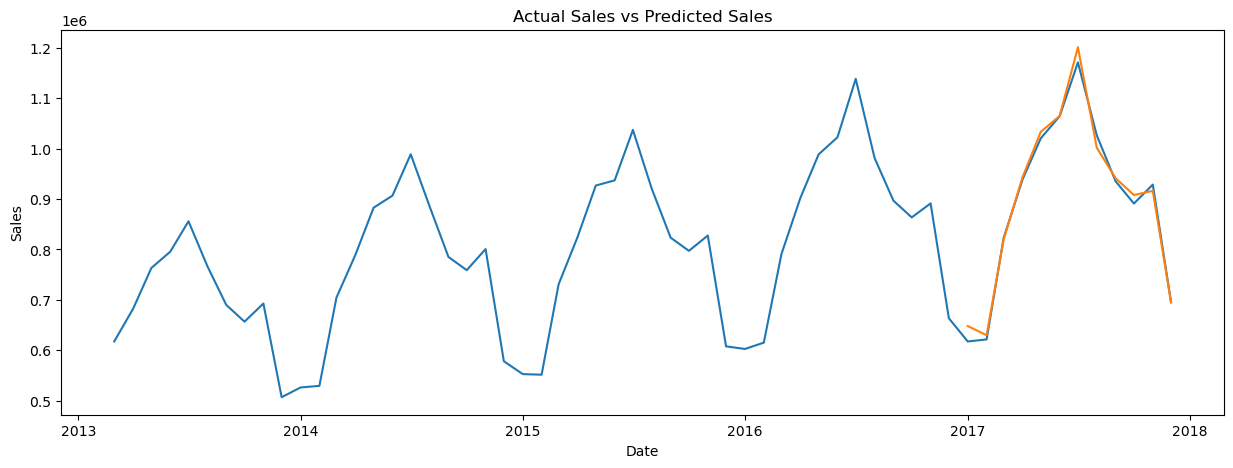

In [373]:
# Plotting actual sales vs predicted sales
plt.figure(figsize=(15, 5))
#actual sales
plt.plot(monthly_sales['date'],monthly_sales['sales'])
#predicted sales
plt.plot(predict_df['date'],predict_df['linear_prediction'])
plt.title('Actual Sales vs Predicted Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

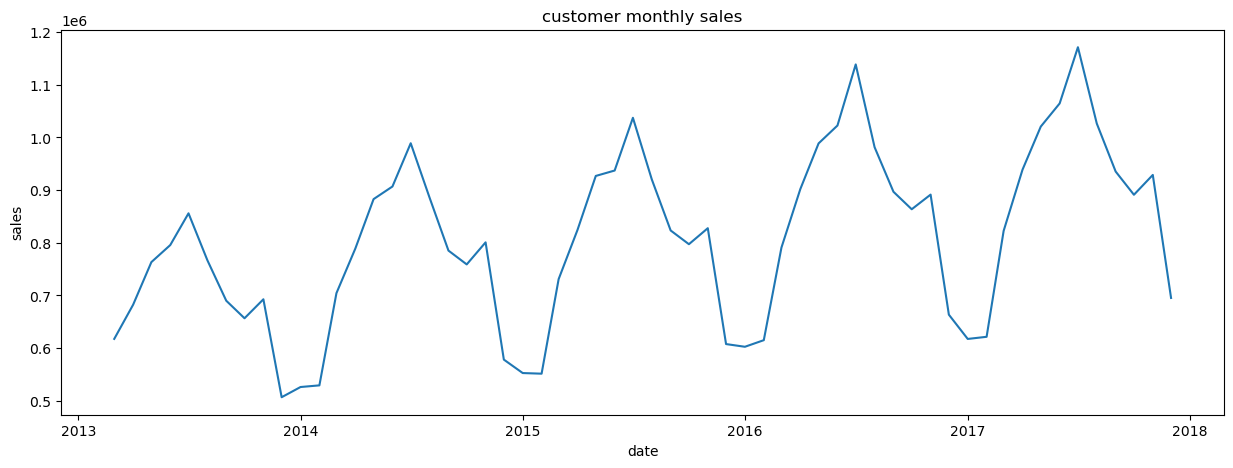

In [173]:
plt.figure(figsize=(15,5))
plt.plot(monthly_sales['date'],monthly_sales['sales'])
plt.xlabel('date')
plt.ylabel('sales')
plt.title('customer monthly sales')
plt.show()

In [181]:
monthly_sales['sales'].head()

2    617382
3    682274
4    763242
5    795597
6    855922
Name: sales, dtype: int64

In [190]:
actual_sales

array([ 663411,  617306,  621369,  822667,  938862, 1020686, 1064624,
       1171393, 1026403,  935263,  891160,  928837,  695170], dtype=int64)

In [183]:
predict_df['linear_prediction'].head()

0    6.478752e+05
1    6.296918e+05
2    8.197435e+05
3    9.433828e+05
4    1.033676e+06
Name: linear_prediction, dtype: float64

# RandomForestRegressor

In [196]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)

C:\Users\python215\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor()

In [212]:
rfr_pre=rfr.predict(x_test)

In [214]:
rfr_pre=rfr_pre.reshape(-1,1)
rfr_predict=np.concatenate([rfr_pre,x_test],axis=1)
rfr_predict=scaler.inverse_transform(rfr_predict)

In [216]:
result_list = []
for index in range(len(rfr_predict)):
    result_list.append(rfr_predict[index][0] + actual_sales[index])

In [226]:
rfr_predict_series = pd.Series(result_list, name='rfr_prediction')

In [228]:
rfr_predict_series

0      651729.66
1      623483.31
2      794762.94
3      926743.73
4     1033887.17
5     1040124.15
6     1172062.31
7     1036541.12
8      930282.09
9      904053.34
10     916390.98
11     718876.20
Name: rfr_prediction, dtype: float64

In [230]:
predict_df = predicted_df.merge(rfr_predict_series,left_index=True,right_index=True)

In [224]:
predict_df

,date,linear_prediction
0,2017-01-01,651729.66
1,2017-02-01,623483.31
2,2017-03-01,794762.94
3,2017-04-01,926743.73
4,2017-05-01,1033887.17
5,2017-06-01,1040124.15
6,2017-07-01,1172062.31
7,2017-08-01,1036541.12
8,2017-09-01,930282.09
9,2017-10-01,904053.34


In [232]:
# Model Evaluation
rfr_mse=np.sqrt(mean_squared_error(predict_df['rfr_prediction'],monthly_sales['sales'][-12:]))
rfr_mae=mean_absolute_error(predict_df['rfr_prediction'],monthly_sales['sales'][-12:])
rfr_r2=r2_score(predict_df['rfr_prediction'],monthly_sales['sales'][-12:])

print(f"Random forest Regression MSE: {rfr_mse}")
print(f"Random forest Regression MAE: {rfr_mae}")
print(f"Random forest Regression R2 Score: {rfr_r2}")

Random forest Regression MSE: 18029.20249741656
Random forest Regression MAE: 14924.601666666704
Random forest Regression R2 Score: 0.987573757986529


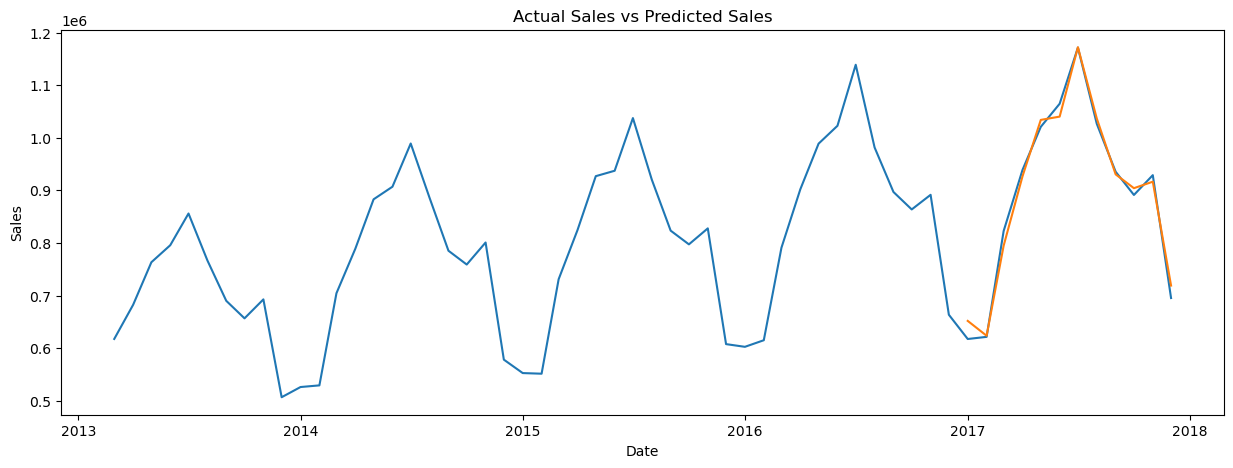

In [234]:
# Plotting actual sales vs predicted sales
plt.figure(figsize=(15, 5))
#actual sales
plt.plot(monthly_sales['date'],monthly_sales['sales'])
#predicted sales
plt.plot(predict_df['date'],predict_df['rfr_prediction'])
plt.title('Actual Sales vs Predicted Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

In [256]:
monthly_sales

,date,sales,sales_diff
2,2013-03-01,617382,157965.0
3,2013-04-01,682274,64892.0
4,2013-05-01,763242,80968.0
5,2013-06-01,795597,32355.0
6,2013-07-01,855922,60325.0
7,2013-08-01,766761,-89161.0
8,2013-09-01,689907,-76854.0
9,2013-10-01,656587,-33320.0
10,2013-11-01,692643,36056.0
11,2013-12-01,506607,-186036.0
